* In this chapter we will be using the MNIST dataset, which is a set of 70,000 small images of digits handwritten by high school students and employees of the US Census Bureau. Each image is labeled with the digit it represents. This set has been studied so much that it is often called the “hello world” of machine learning: whenever people come up with a new classification algorithm they are curious to see how it will perform on MNIST, and anyone who learns machine learning tackles this dataset sooner or later.

In [1]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', as_frame=False)

In [2]:
X, y = mnist.data, mnist.target

In [3]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [4]:
y

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [5]:
print("X Shape: ", X.shape) 
print("y Shape: ", y.shape)

X Shape:  (70000, 784)
y Shape:  (70000,)


*  There are 70,000 images, and each image has 784 features. This is because each image is 28 × 28 pixels, and each feature simply represents one pixel’s intensity, from 0 (white) to 255 (black).

* Let’s take a peek at one digit from the dataset.

In [6]:
import matplotlib.pyplot as plt

def plot_digit(image_data):
    image = image_data.reshape(28, 28)
    plt.figure(figsize=(3, 2))
    plt.imshow(
        image,
        cmap='binary'
    )
    plt.axis('off')

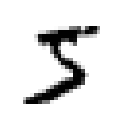

In [7]:
some_digit = X[0]
plot_digit(some_digit)
plt.show()

* It's look like 5, let's check it.

In [8]:
y[0]

'5'

* Hot Dammnn ! it's 🔥

* Create Test Set

In [9]:
X_train, X_test, y_train, y_test = X[:60000], X[6000], y[:60000], y[60000:]